# 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

In [3]:
print(SUPPORTED_TASKS.items())

dict_items([('audio-classification', {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}), ('automatic-speech-recognition', {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}), ('feature-extraction', {'impl': <class 'transformers.pipelines.feature_extraction.FeatureExtractionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModel'>,), 'default': {'model': {'pt': ('distilbert-base-cased', '935ac13'), 'tf': ('distilbert-b

In [4]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
feature-extraction {'impl': <class 'transformers.pipelines.feature_extraction.FeatureExtractionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModel'>,), 'default': {'model': {'pt': ('distilbert-base-cased', '935ac13'), 'tf': ('distilbert-base-cased', '935ac13')}}, 't

# Pipeline的创建与使用方式

In [5]:
from transformers import *

c:\Users\yuyao\miniconda3\envs\transformers\lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
c:\Users\yuyao\miniconda3\envs\transformers\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


## 根据任务类型直接创建Pipeline, 默认都是英文的模型

In [7]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english\snapshots\3d65bad49c7ba6f71920504507a8927f4b9db6c0\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilber

In [8]:
pipe("very good!")

[{'label': 'POSITIVE', 'score': 0.9998525381088257}]

## 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [9]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\9498566e5da5b6cdc52f8eea002be9c24aae959a\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type

In [10]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

## 预先加载模型，再创建Pipeline

In [14]:
# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\9498566e5da5b6cdc52f8eea002be9c24aae959a\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type

In [12]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

In [15]:
pipe.model.device

device(type='cpu')

In [16]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.019777138233184815


## 使用GPU进行推理

In [19]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\9498566e5da5b6cdc52f8eea002be9c24aae959a\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type

In [20]:
pipe.model.device

device(type='cuda', index=0)

In [25]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.006224198341369629


## 确定Pipeline参数

In [26]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--roberta-base-chinese-extractive-qa\snapshots\d5e37a8228fa9d396ff4b093c21e8f0082ff11e1\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-chinese-extractive-qa",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--rob

In [27]:
qa_pipe

In [ ]:
QuestionAnsweringPipeline 

In [29]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=1)

{'score': 0.00228740437887609, 'start': 6, 'end': 7, 'answer': '北'}

# 其他Pipeline示例

In [30]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\config.json
Model config OwlViTConfig {
  "_commit_hash": "17740e19dde58d657d21b970ead1cce0ea40f4da",
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "_name_or_path": "",
    "add_cross_attention": false,
    "architectures": null,
    "attention_dropout": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 0,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "dropout": 0.0,
    "early_stopping": false,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 2,
  

loading weights file pytorch_model.bin from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\pytorch_model.bin
All model checkpoint weights were used when initializing OwlViTForObjectDetection.

All the weights of OwlViTForObjectDetection were initialized from the model checkpoint at google/owlvit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use OwlViTForObjectDetection for predictions without further training.


loading file vocab.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\vocab.json
loading file merges.txt from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\special_tokens_map.json
loading file tokenizer_config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\tokenizer_config.json
ftfy or spacy is not installed using custom BasicTokenizer instead of ftfy.


loading configuration file preprocessor_config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\17740e19dde58d657d21b970ead1cce0ea40f4da\preprocessor_config.json
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}), got [768, 768]. Converted to {'height': 768, 'width': 768}.
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}), got 768. Converted to {'height': 768, 'width': 768}.
Image processor OwlViTImageProcessor {
  "crop_size": {
    "height": 768,
    "width": 768
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "ima

In [32]:
ZeroShotObjectDetectionPipeline 

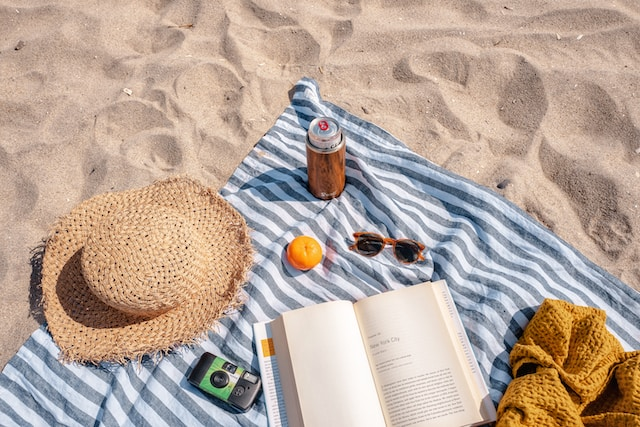

In [35]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [36]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.22561945021152496,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 265}},
 {'score': 0.15738649666309357,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 503, 'ymax': 427}},
 {'score': 0.10808203369379044,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 172, 'xmax': 260, 'ymax': 363}}]

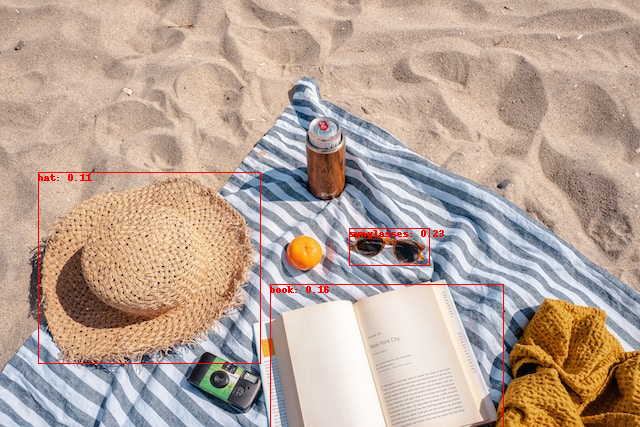

In [37]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# Pipeline背后的实现

In [38]:
from transformers import *
import torch

In [39]:
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at C:\Users\yuyao/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\9498566e5da5b6cdc52f8eea002be9c24aae959a\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type

In [40]:
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [41]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [42]:
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.9736, 0.0264]], grad_fn=<SoftmaxBackward0>)

In [43]:
pred = torch.argmax(logits).item()
pred

0

In [44]:
model.config.id2label

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [45]:
result = model.config.id2label.get(pred)
result

'negative (stars 1, 2 and 3)'